Ridge Regression:
  Best alpha: 0.11497569953977356
  Training MSE: 0.5179
  Testing MSE: 0.5559
Coefficients: [ 0.85437657  0.12255518 -0.29438717  0.33923056 -0.00230479 -0.04082955
 -0.89684127 -0.86975305]

Lasso Regression:
  Best alpha: 0.001
  Training MSE: 0.5180
  Testing MSE: 0.5545
Coefficients: [ 0.84914038  0.12334631 -0.28127333  0.32604963 -0.00106185 -0.03988954
 -0.88582217 -0.85809324]

Coefficient Comparison:
      Feature     Ridge     Lasso
0      MedInc  0.854377  0.849140
1    HouseAge  0.122555  0.123346
2    AveRooms -0.294387 -0.281273
3   AveBedrms  0.339231  0.326050
4  Population -0.002305 -0.001062
5    AveOccup -0.040830 -0.039890
6    Latitude -0.896841 -0.885822
7   Longitude -0.869753 -0.858093


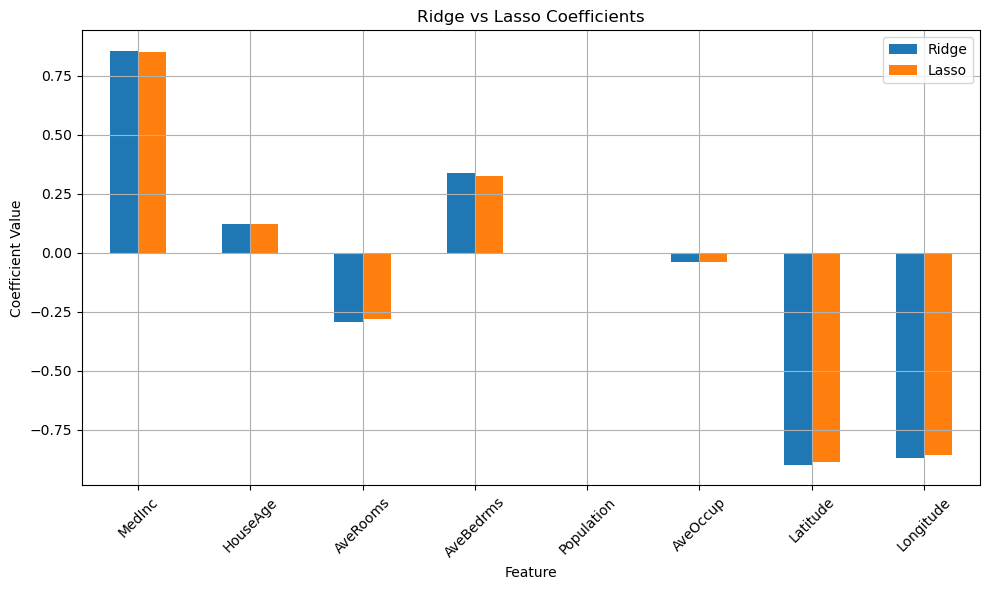

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
cal_housing = fetch_california_housing(as_frame=True)  # Load dataset; as_frame=True returns data as Pandas DataFrame
X = cal_housing.data       # Features (independent variables)
y = cal_housing.target     # Target (dependent variable - house prices)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Standardize features (important for Ridge and Lasso)
scaler = StandardScaler() # Standardizes features to have zero mean and unit variance.
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform training data
X_test_scaled = scaler.transform(X_test)      # Transform test data using the same scaler


# Ridge Regression
ridge = Ridge() # Initialize Ridge Regression model
param_grid_ridge = {'alpha': np.logspace(-3, 3, 100)} # Range of alpha (regularization strength) values to test via cross-validation.
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error') # GridSearchCV finds the best alpha using 5-fold cross-validation.
ridge_cv.fit(X_train_scaled, y_train) # Fit the model to the scaled training data


# Lasso Regression
lasso = Lasso() # Initialize Lasso Regression model
param_grid_lasso = {'alpha': np.logspace(-3, 3, 100)} # Range of alpha values to test
lasso_cv = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error') # GridSearchCV for Lasso, same as Ridge.
lasso_cv.fit(X_train_scaled, y_train) # Fit the model to the scaled training data


# Evaluate and compare models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train) # Predictions on training data
    y_test_pred = model.predict(X_test)   # Predictions on test data
    train_mse = mean_squared_error(y_train, y_train_pred) # Mean Squared Error on training data
    test_mse = mean_squared_error(y_test, y_test_pred)   # Mean Squared Error on test data
    return train_mse, test_mse, model.best_estimator_.coef_ # Return MSE and coefficients


ridge_train_mse, ridge_test_mse, ridge_coef = evaluate_model(ridge_cv, X_train_scaled, y_train, X_test_scaled, y_test)
lasso_train_mse, lasso_test_mse, lasso_coef = evaluate_model(lasso_cv, X_train_scaled, y_train, X_test_scaled, y_test)

# Report results
print("Ridge Regression:")
print(f"  Best alpha: {ridge_cv.best_params_['alpha']}") # Best regularization strength found by GridSearchCV
print(f"  Training MSE: {ridge_train_mse:.4f}")
print(f"  Testing MSE: {ridge_test_mse:.4f}")
print("Coefficients:", ridge_coef)

print("\nLasso Regression:")
print(f"  Best alpha: {lasso_cv.best_params_['alpha']}") # Best regularization strength for Lasso
print(f"  Training MSE: {lasso_train_mse:.4f}")
print(f"  Testing MSE: {lasso_test_mse:.4f}")
print("Coefficients:", lasso_coef)

# Analysis of Coefficients
print("\nCoefficient Comparison:")
coef_df = pd.DataFrame({'Feature': cal_housing.feature_names, 'Ridge': ridge_coef, 'Lasso': lasso_coef}) # Compare coefficients from both models
print(coef_df)

# Plot
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Ridge': ridge_coef,
    'Lasso': lasso_coef
})

coefs.set_index('Feature').plot(kind='bar', figsize=(10, 6))
plt.title('Ridge vs Lasso Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



##### The analysis uses Ridge and Lasso regression to predict California house prices. Both models yielded similar Mean Squared Error (MSE) values, indicating comparable predictive accuracy. However, Lasso's key characteristic, which is shrinking some coefficients to zero became apparent. While both models identified MedInc as the strongest positive predictor of price and location (latitude and longitude) as strong negative predictors, Lasso downweighted the influence of population density more than Ridge did. This demonstrates Lasso's feature selection capability, simplifying the model and potentially improving interpretability.

##### Regarding California house prices, as predicted by both models, are heavily influenced by MedInc, higher income areas command higher prices. Location plays a key, negative role; certain geographic areas are simply less expensive. Surprisingly, the average number of rooms showed a negative correlation, suggesting that other factors (like house size or location) are at play. Population density and occupancy had minimal impact.